<a href="https://colab.research.google.com/github/victoralves87/analiseDados-colab/blob/main/suplemento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/Supplement_Sales_Weekly_Expanded.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


# ***ETL!!***

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [20]:
#nehuma coluna com dados nulos!
df.isnull().sum()

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [7]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [21]:
'''
a coluna de DATE está como object irei tranformar para o formato date e criar
uma nova coluna com o ano e outra com o mês e outra para semanas
'''
df.dtypes

,0
Date,object
Product Name,object
Category,object
Units Sold,int64
Price,float64
Revenue,float64
Discount,float64
Units Returned,int64
Location,object
Platform,object


In [24]:
 # Se a data estiver no formato 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Product Name,object
Category,object
Units Sold,int64
Price,float64
Revenue,float64
Discount,float64
Units Returned,int64
Location,object
Platform,object


In [32]:
# Criando as colunas ano, mês e semana
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Semana'] = df['Date'].dt.isocalendar().week

df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform', 'Ano', 'Mes',
       'Semana'],
      dtype='object')

In [35]:
#renomeando minhas colounas

df = df.rename(columns={
    'Date': 'Data',
    'Product Name': 'Nome do Produto',
    'Category': 'Categoria',
    'Units Sold': 'Unidades Vendidas',
    'Price': 'Preço',
    'Revenue': 'Receita',
    'Discount': 'Desconto',
    'Units Returned': 'Unidades Devolvidas',
    'Location': 'Localização',
    'Platform': 'Plataforma',
    'Ano': 'Ano',
    'Mes': 'Mês',
    'Semana': 'Semana'
})

df.columns

Index(['Data', 'Nome do Produto', 'Categoria', 'Unidades Vendidas', 'Preço',
       'Receita', 'Desconto', 'Unidades Devolvidas', 'Localização',
       'Plataforma', 'Ano', 'Mês', 'Semana'],
      dtype='object')

# ***EDA***

In [36]:
df.describe()

,Data,Unidades Vendidas,Preço,Receita,Desconto,Unidades Devolvidas,Ano,Mês,Semana
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.0
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478,2022.149635,6.284672,25.718978
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000,2020.000000,1.000000,1.0
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000,2021.000000,3.000000,12.0
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000,2022.000000,6.000000,25.0
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000,2023.000000,9.000000,39.0
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000,2025.000000,12.000000,53.0
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479,1.522351,3.495858,15.252845


In [38]:
df.groupby('Categoria')['Unidades Vendidas'].sum().sort_values(ascending=False)

,Unidades Vendidas
Categoria,
Mineral,123668
Vitamin,123434
Performance,82523
Protein,82120
Herbal,41408
Omega,41325
Sleep Aid,41165
Hydration,41065
Amino Acid,41027


In [42]:
#produtos que mais geraram receita
df.groupby('Nome do Produto')['Receita'].sum().sort_values(ascending=False)

,Receita
Nome do Produto,
Biotin,1486798.62
Zinc,1482546.95
Pre-Workout,1477183.78
BCAA,1464819.63
Fish Oil,1451065.87
Green Tea Extract,1440900.05
Collagen Peptides,1433297.24
Creatine,1432518.40
Iron Supplement,1431582.41


In [40]:
#receita das plataformas de vendas
df.groupby('Plataforma')['Receita'].sum().sort_values(ascending=False)


,Receita
Plataforma,
iHerb,7855261.05
Amazon,7669451.78
Walmart,7388567.62


In [41]:
#Vendas por país
df.groupby('Localização')['Receita'].sum().sort_values(ascending=False)


,Receita
Localização,
Canada,7848579.73
UK,7703960.34
USA,7360740.38


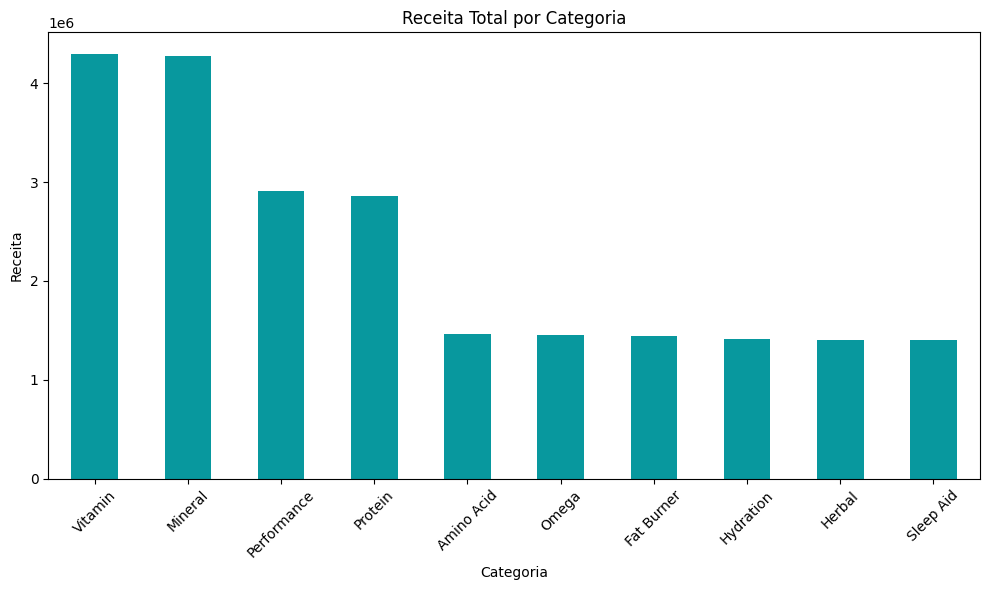

In [43]:
import matplotlib.pyplot as plt

# Calculando a receita total por categoria
categoria_receita = df.groupby('Categoria')['Receita'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
categoria_receita.plot(kind='bar', color='#08989e')
plt.title('Receita Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


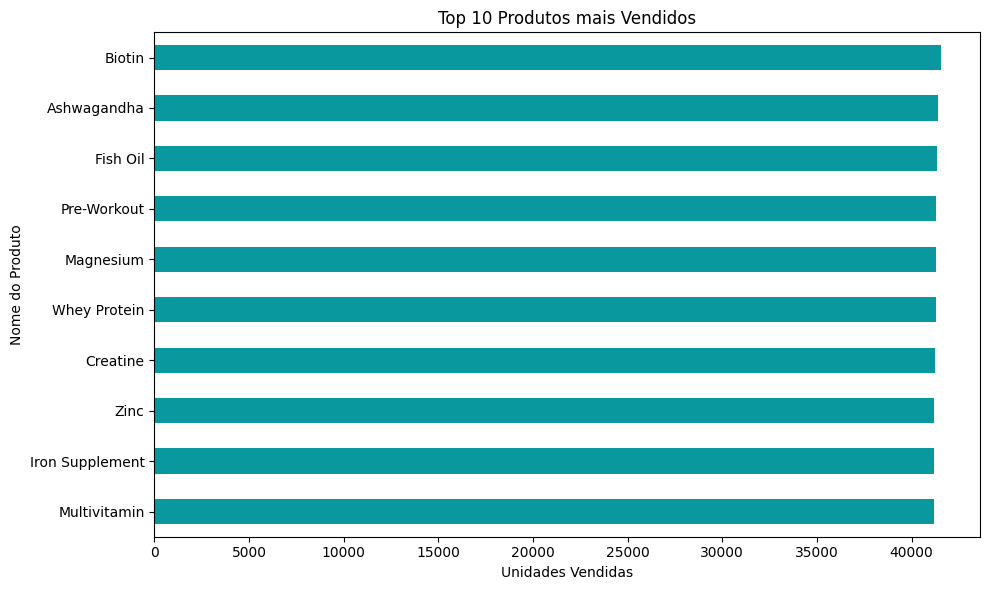

In [44]:
# Top 10 produtos mais vendidos
top10_produtos = df.groupby('Nome do Produto')['Unidades Vendidas'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras horizontais
plt.figure(figsize=(10,6))
top10_produtos.plot(kind='barh', color='#08989e')
plt.title('Top 10 Produtos mais Vendidos')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Nome do Produto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


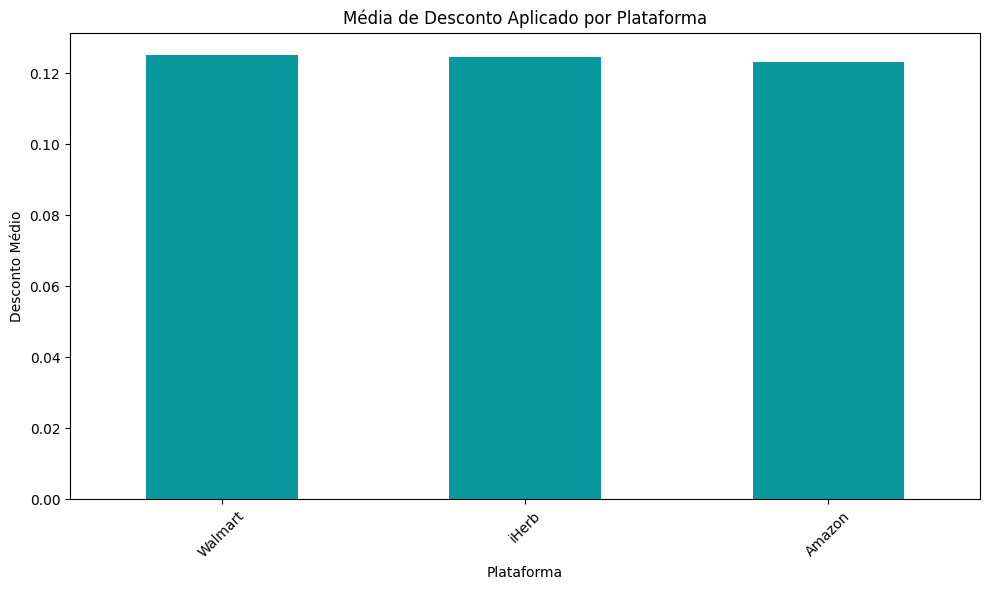

In [46]:
# Calculando a média de desconto por plataforma
desconto_plataforma = df.groupby('Plataforma')['Desconto'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
desconto_plataforma.plot(kind='bar', color='#08989e')
plt.title('Média de Desconto Aplicado por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Desconto Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


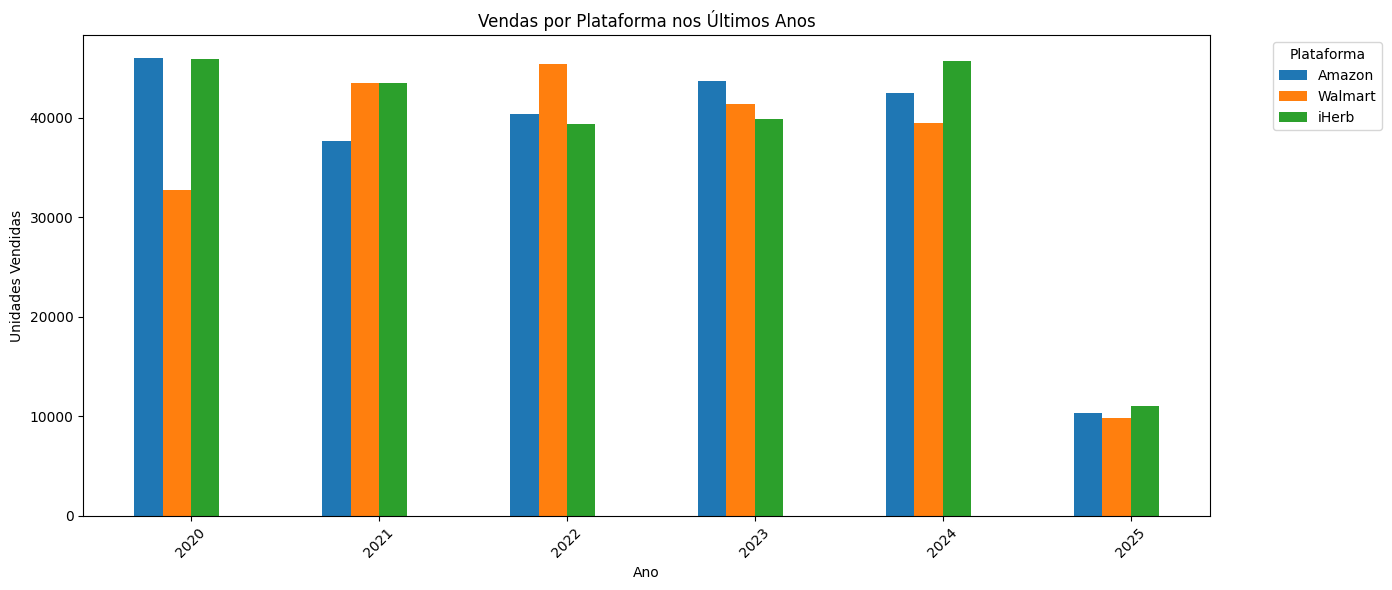

In [50]:
import numpy as np

# Agrupando os dados por Ano e Plataforma, somando as unidades vendidas
vendas_ano_plataforma = df.groupby(['Ano', 'Plataforma'])['Unidades Vendidas'].sum().unstack().fillna(0)

# Criando o gráfico de barras agrupadas
anos = vendas_ano_plataforma.index.astype(str)
plataformas = vendas_ano_plataforma.columns
bar_width = 0.15
x = np.arange(len(anos))

plt.figure(figsize=(14,6))

for i, plataforma in enumerate(plataformas):
    plt.bar(x + i * bar_width, vendas_ano_plataforma[plataforma], width=bar_width, label=plataforma)

plt.xlabel('Ano')
plt.ylabel('Unidades Vendidas')
plt.title('Vendas por Plataforma nos Últimos Anos')
plt.xticks(x + bar_width * (len(plataformas) / 2), anos, rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* **Walmart** **consistente**: O Walmart apresenta um desempenho consistente e geralmente é a plataforma com maior volume de vendas em quase todos os anos, exceto em 2020, onde fica ligeiramente abaixo da Amazon.

* **Amazon** forte início, queda final: A Amazon começa com as maiores vendas em 2020, mas demonstra uma ligeira queda de desempenho

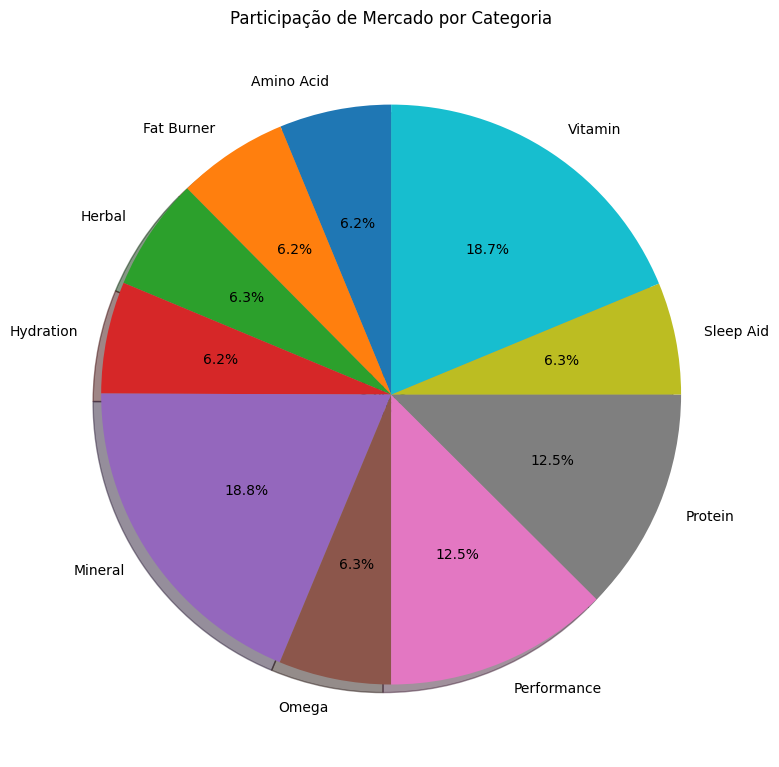

In [48]:
categoria_vendas = df.groupby('Categoria')['Unidades Vendidas'].sum()

plt.figure(figsize=(8,8))
categoria_vendas.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Participação de Mercado por Categoria')
plt.ylabel('')
plt.tight_layout()
plt.show()
